In [1]:
from pocket_cube.cube import Cube
from pocket_cube.cube import Move
from pocket_cube.astar import astar
from pocket_cube.bidirectionalBFS import bidirectional_bfs

import time
import matplotlib.pyplot as plt

%matplotlib inline

## Let's declare a variable that allows the run of tests and plotting

In [2]:
# When set to True, it will allow testing and plotting data for the algorithms over the 4 test cases
testingEnabled = False

# Creating a scrambled cube 

In [3]:
cube = Cube("F' R U R U F' U'")

## 2D Cube visualization 

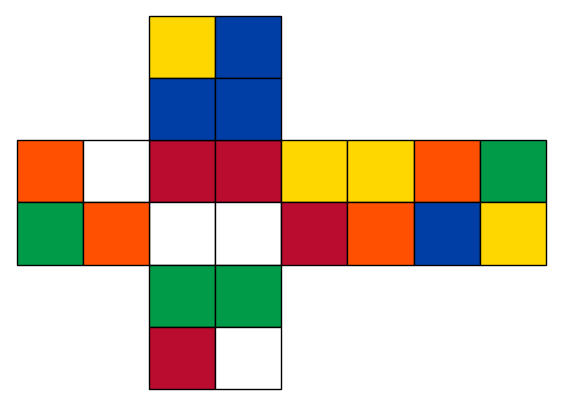

In [4]:
cube.render()

## Text representation 

In [5]:
cube.render_text()

  YB
  BB
OWRRYYOG
GOWWROBY
  GG
  RW


## 3D Cube visualization

For an interactive view of the cube, don't forget to use `%matplotlib notebook`

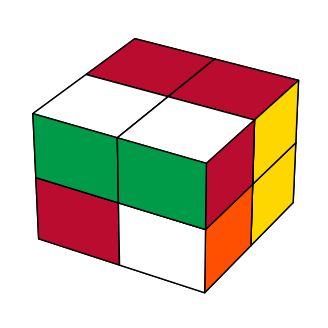

In [6]:
cube.render3D()

# Creating an unscrambled cube 

In [7]:
cube = Cube(scrambled=False)

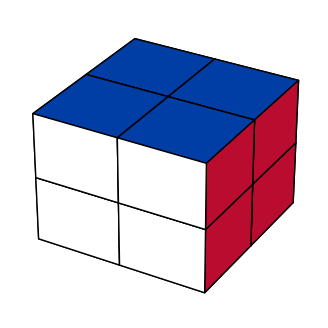

In [8]:
cube.render3D()

## Applying moves on the cube 

In [9]:
cube.scramble()

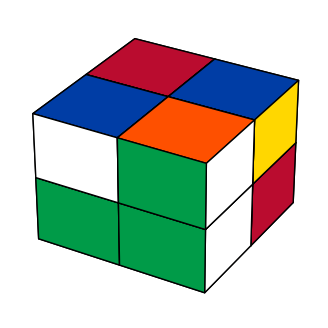

In [10]:
cube.render3D()

## Tests (ascending complexity)

In [11]:
case1 = "R U' R' F' U"
case2 = "F' R U R U F' U'"
case3 = "F U U F' U' R R F' R"
case4 = "U' R U' F' R F F U' F U U"

# A* Algorithm

### Defined a function that will actually apply the solution (list of moves) to the Cube
- Basically it will solve the cube (so we can render the solved cube for example)

In [12]:
def apply_solution(cube, solution_moves):
    """Apply the solution moves to the cube."""
    for move in solution_moves:
        cube.state = Cube.move_state(cube.state, move)

In [13]:
# Run A* algorithm with the defined heuristic
cube_copy = cube.clone()
start_time = time.time()
solution, moves = astar(cube_copy)
end_time = time.time()

print("Solution of length " + str(len(solution)) + " :\n", [Move(move) for move in solution])
print("Number of states discovered:", moves)
# Print the execution time
print("Execution Time:", end_time - start_time, "seconds\n")
apply_solution(cube_copy, solution);

Solution of length 4 :
 [<Move.Fp: 4>, <Move.Up: 5>, <Move.Rp: 3>, <Move.F: 1>]
Number of states discovered: 666
Execution Time: 0.8410177230834961 seconds



Cube solved by A* algorithm


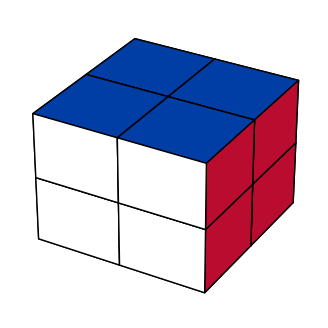

In [14]:
print("Cube solved by A* algorithm")
cube_copy.render3D()

## Let's define a function that will test the algorithm using the 4 test cases that we've got

In [15]:
def TestFunction(algorithm):
    print("Running the 4 dificulty tests for the algorithm")
    time1, sol_len1, states_discovered1, solution1 = Test(algorithm, case1, 1)
    time2, sol_len2, states_discovered2, solution2 = Test(algorithm, case2, 2)
    time3, sol_len3, states_discovered3, solution3 = Test(algorithm, case3, 3)
    time4, sol_len4, states_discovered4, solution4 = Test(algorithm, case4, 4)

    # Test data
    test_cases = ['Case 1', 'Case 2', 'Case 3', 'Case 4']
    times = [time1, time2, time3, time4]
    sol_lengths = [sol_len1, sol_len2, sol_len3, sol_len4]
    states_discovered = [states_discovered1, states_discovered2, states_discovered3, states_discovered4]
    
    # Let's render just most difficult one after solving it
    if solution4:
        cube4 = Cube(case4)
        print("Cube4 initial state")
        cube4.render3D()
        apply_solution(cube4, solution4);
        print("Cube4 after solving by algorithm")
        cube4.render3D()

    return test_cases, times, sol_lengths, states_discovered
    
def Test(algorithm, test_case, test_number):
    cube = Cube(test_case)
    start_time = time.time()
    solution, states_discovered = algorithm(cube)
    end_time = time.time()

    # Preparing the returning values
    deltaTime = end_time - start_time
    sol_len = str(len(solution))
    
    # Print the solution and the number of iterations
    print("TEST " + str(test_number))
    print("Solution of length " + sol_len + " :\n", [Move(move) for move in solution])
    print("Number of states discovered:", states_discovered)
    # Print the execution time
    print("Execution Time:", deltaTime, "seconds\n")
    return deltaTime, sol_len, states_discovered, solution


## A* Algorithm Testing

In [16]:
if testingEnabled:
    test_cases, times, sol_lengths, states_discovered = TestFunction(astar)

## Let's define a function for Plotting stats for the algorithm

In [17]:
def Plotting(test_cases, times, sol_lengths, states_discovered):
    # Plotting time values
    plt.figure(figsize=(10, 5))
    plt.bar(test_cases, times, color='blue')
    plt.title('Execution Time for Different Test Cases')
    plt.xlabel('Test Cases')
    plt.ylabel('Time (seconds)')
    plt.show()
    
    # Plotting solution lengths
    plt.figure(figsize=(10, 5))
    plt.bar(test_cases, sol_lengths, color='green')
    plt.title('Solution Length for Different Test Cases')
    plt.xlabel('Test Cases')
    plt.ylabel('Solution Length')
    plt.show()
    
    # Plotting states discovered
    plt.figure(figsize=(10, 5))
    plt.bar(test_cases, states_discovered, color='orange')
    plt.title('Number of States Discovered for Different Test Cases')
    plt.xlabel('Test Cases')
    plt.ylabel('States Discovered')
    plt.show()

## A* Statistics and Plotting over the 4 test cases

In [18]:
if testingEnabled:
    Plotting(test_cases, times, sol_lengths, states_discovered)

# Bidirectional BFS Algorithm

In [19]:
# Run A* algorithm with the defined heuristic
cube_copy = cube.clone()
start_time = time.time()
solution, moves = bidirectional_bfs(cube_copy)
end_time = time.time()

print("Solution of length " + str(len(solution)) + " :\n", [Move(move) for move in solution])
print("Number of states discovered:", moves)
# Print the execution time
print("Execution Time:", end_time - start_time, "seconds\n")
apply_solution(cube_copy, solution);

explored_start
{(1, 0, 0, 3, 4, 1, 5, 5, 4, 2, 1, 1, 3, 5, 4, 3, 4, 0, 0, 3, 5, 2, 2, 2): <pocket_cube.bidirectionalBFS.Node object at 0x7fa969323e80>, (1, 2, 0, 2, 5, 4, 5, 1, 3, 2, 0, 1, 3, 5, 4, 3, 4, 0, 0, 3, 5, 1, 2, 4): <pocket_cube.bidirectionalBFS.Node object at 0x7fa9694e3970>, (1, 0, 4, 3, 4, 1, 0, 3, 4, 2, 5, 5, 3, 5, 1, 1, 4, 0, 0, 3, 2, 5, 2, 2): <pocket_cube.bidirectionalBFS.Node object at 0x7fa9694e3940>, (0, 1, 3, 0, 0, 1, 3, 5, 4, 2, 1, 1, 3, 5, 4, 2, 4, 0, 3, 5, 5, 4, 2, 2): <pocket_cube.bidirectionalBFS.Node object at 0x7fa9694e30d0>, (1, 0, 0, 3, 1, 5, 4, 5, 2, 2, 2, 1, 3, 5, 4, 3, 4, 1, 0, 4, 5, 0, 2, 3): <pocket_cube.bidirectionalBFS.Node object at 0x7fa9694e3fd0>, (1, 0, 5, 5, 4, 1, 1, 1, 4, 2, 4, 3, 3, 5, 0, 3, 4, 0, 0, 3, 2, 2, 5, 2): <pocket_cube.bidirectionalBFS.Node object at 0x7fa9694e11e0>, (0, 3, 1, 0, 2, 1, 5, 5, 4, 2, 1, 1, 3, 3, 4, 0, 4, 0, 4, 5, 5, 3, 2, 2): <pocket_cube.bidirectionalBFS.Node object at 0x7fa9694e2530>, (1, 1, 0, 4, 5, 5, 1, 4, 3, 2, 0

Cube initial state


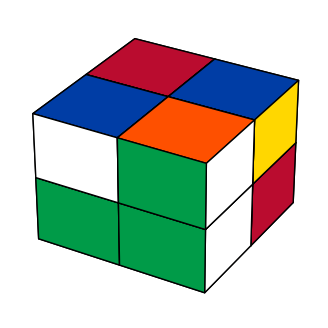

In [20]:
print("Cube initial state")
cube.render3D()

Cube solved by Bidirectional BFS


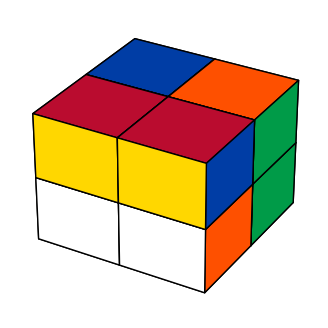

In [21]:
print("Cube solved by Bidirectional BFS")
cube_copy.render3D()

## Bidirectional BFS Algorithm Testing

In [22]:
if testingEnabled:
    test_cases, times, sol_lengths, states_discovered = TestFunction(bidirectional_bfs)

## Bidirectional BFS Statistics and Plotting over the 4 test cases

In [23]:
if testingEnabled:
    Plotting(test_cases, times, sol_lengths, states_discovered)